# Let's start learning Tensorflow
We are going to cover:
* Introduction to tensors
* Getting info from tensors
* Manipulating tensors
* Tensors and Numpy
* Using @tf.function to speed up python
* Using GPUs/TPUs with TF
* Excercises


## Introduction to tensors

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.17.0


In [3]:
# Lets create tensors with tf.constant()
scalar = tf.constant('abc')
scalar


<tf.Tensor: shape=(), dtype=string, numpy=b'abc'>

In [4]:
# Let's check the num of dimensions of a tensor (ndim stands for num of dimensions)
scalar.ndim


0

In [5]:
# Let's create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
# check dim of vector
vector.ndim

1

In [7]:
# let's create a matrix
arr = [[10,10], [5,5]]
matrix = tf.constant(arr)
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [ 5,  5]], dtype=int32)>

In [8]:
# Let's see the dim of the matrix
matrix.ndim

2

In [9]:
# Let's start putting the datatypes in here
matrix2 = tf.constant([[10.,7.], [3.,2.], [8.,9.]], dtype=tf.float16)
matrix2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
matrix2.ndim

2

In [11]:
# Lets write a tensor
tensor = tf.constant([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]], [[13,14,15], [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim

3

### What we have done here
* Scaler = 0 dim
* Vector - 1 dim
* matrix - 2 dim
* tensor - n dim (scalar is 0 dim tensor, vector is 1 dim tensor etc)

## Creating tensors with `tf.Variable`

In [13]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [14]:
scalar = tf.Variable(5)
scalar

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [15]:
scalar.assign(10)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>

In [16]:
scalar

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

In [17]:
vector = tf.Variable([10,10])
vector

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>

In [18]:
vector[0].assign(1)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([ 1, 10], dtype=int32)>

In [19]:
vector

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 1, 10], dtype=int32)>

In [20]:
# Creating random tensors
# they are tensors of arbitrary size which contains random numbers

random1 = tf.random.Generator.from_seed(42)
random1 = random1.normal(shape=(3,2))

random3 = tf.random.Generator.from_seed(42)
random3 = random3.normal(shape=(3,2))

random1 == random3

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

In [21]:
random2 = tf.random.Generator.from_seed(42)
random2 = random2.uniform(shape=(3,2))

random4 = tf.random.Generator.from_seed(42)
random4 = random4.uniform(shape=(3,2))

random2 == random4

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

In [22]:
# Shuffling tensor in tensorflow
t1 = tf.constant([[10,7], [3,4], [2,5]])
tf.random.set_seed(42)
tf.random.shuffle(t1) #Shuffle along first dimension


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [23]:
# other ways to make tensors
# Numpy
tf.ones([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [24]:
tf.zeros(shape = (3,2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [25]:
#  we can convert numpy arrays into tensors
# Basic diff between them is tensors can be run on GPU

import numpy as np
array = np.arange(1,25, dtype=np.int32)
array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [26]:
A=tf.constant(array, shape=(2,3,4))
A.ndim

3

### Getting information from tensors
* Shape
* Rank
* Axis/Dimension
* Size

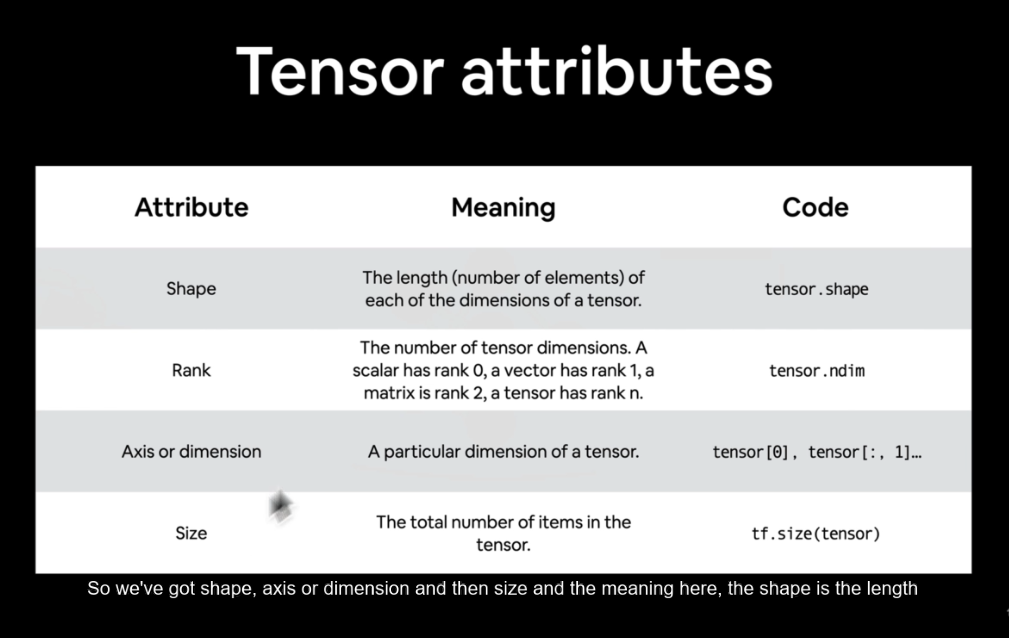

In [27]:
# Create a rank 4 tensor (4 dimension)

rank4_tensor = tf.zeros(shape = [2,3,4,5] )

In [28]:
rank4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [29]:
rank4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [30]:
rank4_tensor.shape, rank4_tensor.ndim, tf.size(rank4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [31]:
# Get various attributes of our tensor
print("Datatype of every element:", rank4_tensor.dtype)
print("Number of dimensions (rank):", rank4_tensor.ndim)
print("Shape of tensor:", rank4_tensor.shape)
print("Elements along axis 0 of tensor:", rank4_tensor.shape[0])
print("Elements along last axis of tensor:", rank4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


### Indexing tensors
* Tensors can be indexed just like python list

In [32]:
# Get the first 2 elem of each dimension
rank4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [33]:
# Get the first element from each dimension from each index except for the final one
rank4_tensor[:1,:1,:1,:]


<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [34]:
rank4_tensor[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [35]:
# Reshaping the tensor
# lets create a rank 2 tensor
rank2_tensor = tf.constant([[1,2], [3,4]])
rank2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [36]:
rank2_tensor.ndim, rank2_tensor.shape

(2, TensorShape([2, 2]))

In [37]:
rank2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4], dtype=int32)>

In [38]:
# Add an extra dim to our rank 2 tensor
rank3_tensor = rank2_tensor[..., tf.newaxis]
rank3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [39]:
# Alternative to tf.newaxis
tf.expand_dims(rank2_tensor, axis = -1) # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [40]:
# Expand xero matrix
tf.expand_dims(rank2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]]], dtype=int32)>

## Manipulating tensors
* Basic Operations
* `+` `-` `*` `/`

In [41]:
# You can perform the following operation to a tensor using the operator
tensor = tf.constant([[10,7],
                      [3,4]])
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [42]:
# Using the tensorflow builtin functions
tf.math.multiply(tensor, 10)
tf.multiply(tensor, 10) # Both same

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

## Matrix multiplications
> One of the most basic and common operation in ML

* Two rules that need to fulfill
* Inner dimension must match
* Resulting matrix has the shape of inner dimensions

In [43]:
# Matrix mul in tf
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [44]:
# Matrix mult with py @ operator
tensor @ tensor


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [45]:
from re import X
# Create a tensor of (3, 2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
# Create another (3, 2) tensor
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [46]:
tf.matmul(X, Y)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

In [48]:
Y = tf.reshape(Y, shape=(2,3))

In [49]:
Y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [50]:
tf.matmul(X,Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [51]:
# Transpose and reshaping is different
tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

**The dot product**
* Matrix mul is also called dot prod
* Can be done by other method too

* `tf.matmul()`
* `tf.tensordor()`

In [52]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>)

In [53]:
# Perform the dot on X and Y
tf.tensordot(X, Y, axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [54]:
# Perform the dot on X and Y
tf.tensordot(tf.transpose(X), tf.transpose(Y), axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 76, 103],
       [100, 136]], dtype=int32)>

### Changing the datatype of the tensor
* 16 bits can run faster in modern comp

In [55]:
B = tf.constant([1.0, 2.0])
C = tf.constant([1,2])

B.dtype, C.dtype

(tf.float32, tf.int32)

In [56]:
# Changing from float31 to float16
B = tf.cast(B, dtype=tf.float16) # float16, bfloat16
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1., 2.], dtype=float16)>,
 tf.float16)

In [57]:
# from int32 to float 32
E = tf.cast(C, dtype=tf.float32)
C, E

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>)

## Aggregating tensors
* Aggregating tensors = condensing them from multiple values to a smaller amount of values


In [58]:
# Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [60]:
# Get the absolute values
tf.abs(D) # turns the negative numbers into positive ones

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Lets go through the following form of aggregation
* Get the max
* get the min
* get the mean
* get the sum of the tensor


In [61]:
# Lets create a random tensor with values between 0-100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([35, 39, 31, 56, 22, 93,  7, 55, 90, 45,  2, 21, 51, 98, 95, 74, 93,
       46, 26, 76, 91, 37, 97, 17, 65, 68, 39, 33, 93, 33, 74, 70, 39, 65,
       33, 57, 35, 72, 17, 50, 48, 34, 68, 57, 88, 19, 16,  8, 30, 39])>

In [63]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [64]:
# Find the min
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [65]:
# Find the max
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [66]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [67]:
# Get the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2547>

In [69]:
# variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=724>

In [72]:
# Standard variance
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=26.90012>

In [74]:
# Find the variance
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=723.6164>

### Finding the positional max and minimum


In [77]:
# Create a new tensor
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [79]:
# find the pos max
tf.argmax(F) # Give the pos of the max element

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [80]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Sqeezing a tensor (removing all single dimension)
> Get rid of the single dimensions

In [86]:
# create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [87]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [88]:
G_sqeezed = tf.squeeze(G)
G_sqeezed, G_sqeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

## One Hot Encoding the tensors

In [94]:
# Create a list of indices
some_list = [0,1,2,3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4) # Depth is the no of cols we r going to have

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [97]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="love", off_value="hate")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'love', b'hate', b'hate', b'hate'],
       [b'hate', b'love', b'hate', b'hate'],
       [b'hate', b'hate', b'love', b'hate'],
       [b'hate', b'hate', b'hate', b'love']], dtype=object)>

In [98]:
# Some other function
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [99]:
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [103]:
tf.math.sqrt(tf.cast(H, dtype=tf.float32)) # should be non int

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [106]:
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

## Tensors and Numpy
* Tensorflow interact beautifully with numpy array
> Tensorflow can run on GPU/TPU which are very fast as compared to NumPy

In [107]:
J = tf.constant(np.array([3.,7.,10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [108]:
# converting the tensor into the numpy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [109]:
# Convert the tensors to a numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [110]:
#  The defualt types of each are slightly different
numpy_J = tf.constant(np.array([3.,7.,10.]))
tensor_J = tf.constant([3.,7.,10.])
# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## Finding access to GPUS

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Sun Oct 13 19:57:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

> **Note** : If you have access to CUDA-enabled GPU, TF automatically use it whenever possible